# Stroke Prediction Using Data Science

Project (Group 10) members-
1. Mansi Zope (001581273)
2. Neeraja Dixit (001584742)
3. Vraj Mashruwala (001004658)

## Problem Statement & Importance

According to the World Health Organization (WHO), stroke is the <b>2nd leading cause of death globally</b>, responsible for approximately 11% of total deaths. It is another health issue that has found to be rising throughout the world due to the adoption of lifestyle changes that disregards healthy lifestyle & good eating habits. Thus, new emerging electronic devices that record the health vitals have paved the way for creating an automated solution with AI techniques at its core. Similar to heart diseases, efforts have begun to create lab tests that predict stroke. The dataset presented here has many factors that highlight the lifestyle of the patients and hence gives us an opportunity to create an AI-based solution for it.

It is said that 80% of heart strokes are preventable. With such a high possibility of prevention, accurately predicting if a person is at the threat of having a stroke could be crucial for health science. The available necessary data is another motivation to proceed with this problem.

## Solution

We aim to build a stroke prediction model. For this we try out 3 different algorithms & carry out hyper parameter tuning for each to come up with the best possible model. This dataset can be found on [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). 

There are a number of steps we follow & describe along the way: 

1. Import libraries & dataset
2. Data Exploration
3. Data Preprocessing
4. Model Training & Hyperparameter tuning - 3 algorithms
5. Model Evaluation/Comparison - for all 3 algorithms
6. Closing remarks

## Dataset Attributes:
    
- **id** : unique identifier
- **gender** : "Male", "Female" or "Other"
- **age** : age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease** : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married** : "No" or "Yes"
- **work_type** : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type** : "Rural" or "Urban"
- **avg_glucose_level** : average glucose level in blood
- **bmi** : body mass index
- **smoking_status** : "formerly smoked", "never smoked", "smokes" or "Unknown"*
- **stroke** : 1 if the patient had a stroke or 0 if not

## 1. Import Python Modules & Dataset

In [1]:
#importing all necessary libraries at once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scikitplot as sciplt
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif, SelectPercentile 
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
#load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## 2. Data Exploration

In [3]:
df.shape #check size of the dataset

(5110, 12)

In [4]:
df.columns #columns in the datatset

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.info() #check dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum() #check number of missing values 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.describe().T #display statistics for the numerical data

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### Print value counts of categorical variables

In [8]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for feature in categorical_features: 
    print(f'Value counts:\n{df[feature].value_counts()}') #print the value counts for each
    print('\n')

Value counts:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value counts:
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value counts:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value counts:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value counts:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




#### Value counts for integer columns 

In [9]:
integer_features = ['stroke', 'hypertension', 'heart_disease']

for feature in integer_features: 
    print(f'Value counts:\n{df[feature].value_counts()}') #print the value counts for each
    print('\n')

Value counts:
0    4861
1     249
Name: stroke, dtype: int64


Value counts:
0    4612
1     498
Name: hypertension, dtype: int64


Value counts:
0    4834
1     276
Name: heart_disease, dtype: int64




#### For the float columns, a distribution plot would be most appropriate to view the data within the column

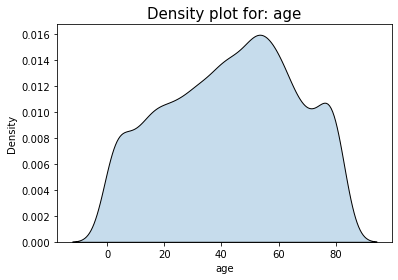

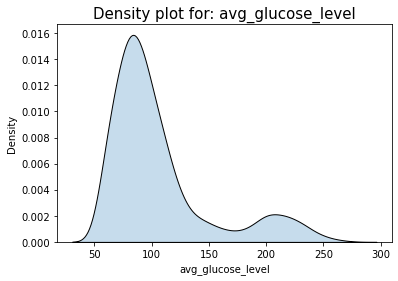

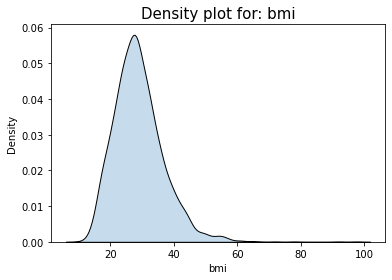

In [10]:
float_features = ['age', 'avg_glucose_level', 'bmi']

for feature in float_features:
    sns.kdeplot(x=df[feature], shade=True, edgecolor='black') #show density plot for each
    plt.title(f'Density plot for: {feature}', fontsize = 15)
    plt.show()

#### Crucial to check for outliers in the float columns, this could help in deciding data cleaning procedures

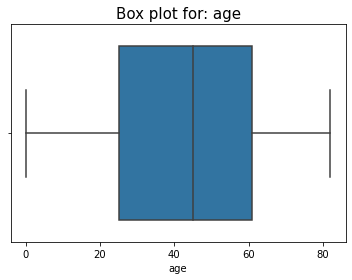

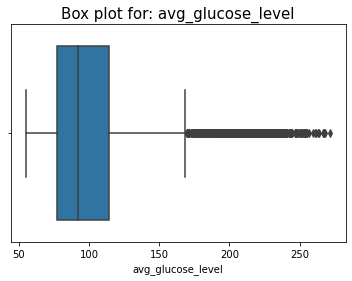

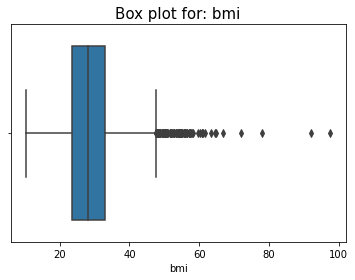

In [11]:
for feature in float_features:
    sns.boxplot(df[feature])
    plt.title(f'Box plot for: {feature}', fontsize = 15)
    plt.show() #show box plot for each

#### Finally, target variable check:

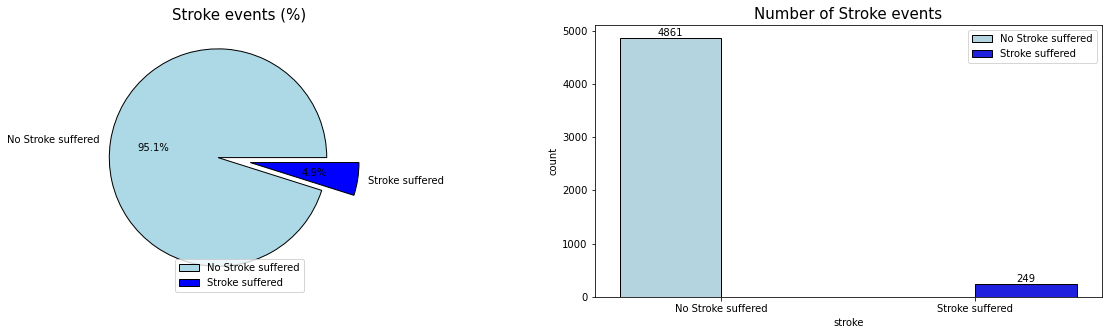

In [12]:
l = list(df['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
colors = ['lightblue', 'blue'] #defining colors for the plots
labels = ['No Stroke suffered', 'Stroke suffered']

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

plt.subplot(1,2,1)
plt.pie(circle,labels = labels, autopct = '%0.1f%%', explode = (0.2,0.1), colors = colors,
        wedgeprops = {'edgecolor':'black'}) #pie plot
plt.legend(labels, loc = 'lower center') #add a legend to the plot
plt.title('Stroke events (%)', fontsize = 15) #title for pie plot

plt.subplot(1,2,2)
ax = sns.countplot(x ='stroke', data = df, hue = 'stroke', palette = colors, edgecolor = 'black')
ax.set_xticklabels(labels) #giving labels to x-axis
abs_values = df['stroke'].value_counts(ascending=False).values #for labeling each vertical bar
for container in ax.containers:
    ax.bar_label(container) #add label to each vertical bar
plt.legend(labels) #add a legend to the graph
plt.title('Number of Stroke events', fontsize = 15);
plt.show()

#### Check data correlationals between all features

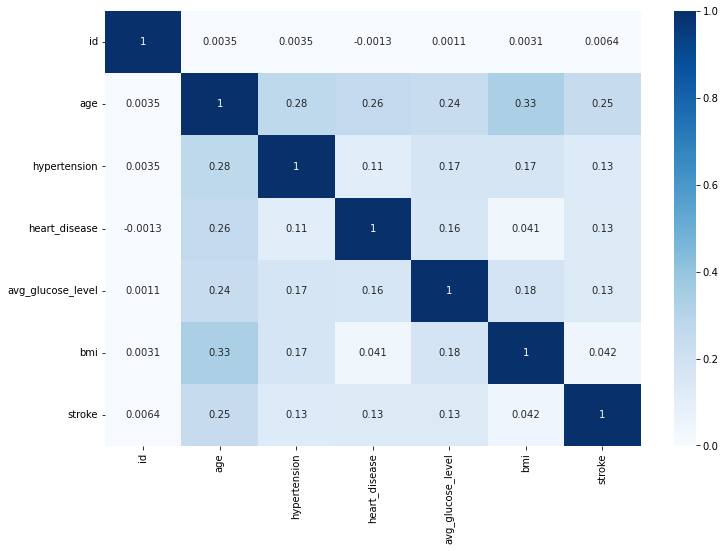

In [13]:
corr = df.corr() #using the corr function
fig = plt.figure(figsize = (12, 8))
ax = sns.heatmap(corr, cmap = "Blues", annot = True) #annot helps display the values as well in the heatmap
plt.show()

#### Visualize features w.r.t. each class of target variable

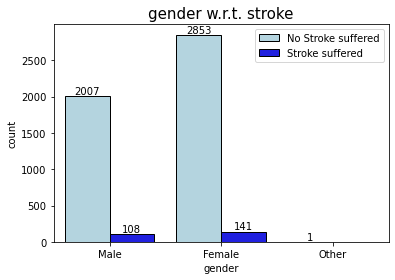

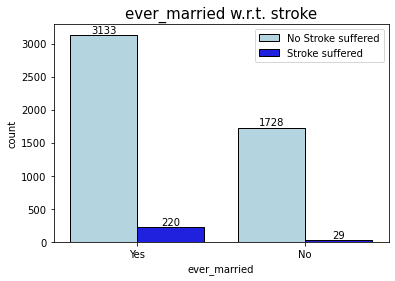

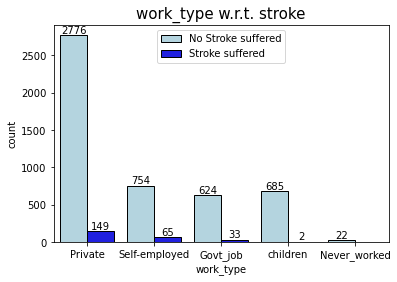

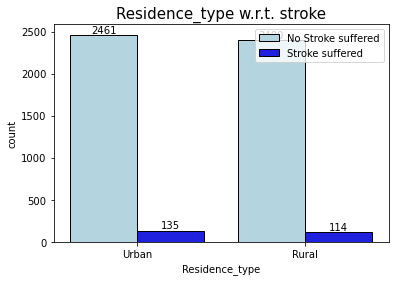

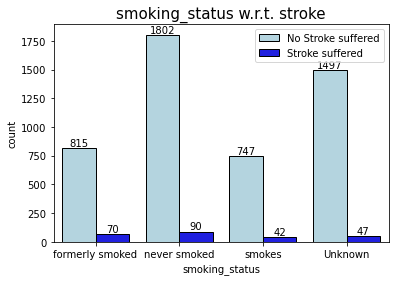

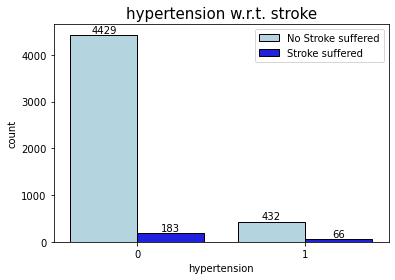

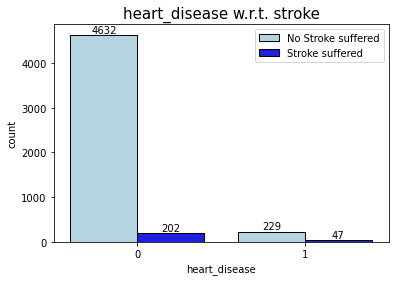

In [14]:
features_for_countplot = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 
                          'hypertension', 'heart_disease']
for feature in features_for_countplot:
    plt.plot()
    ax = sns.countplot(x = feature, data = df, hue = 'stroke', palette = colors, edgecolor = 'black')
    abs_values = df[feature].value_counts(ascending=False).values #for labeling each vertical bar
    for container in ax.containers:
        ax.bar_label(container) #add label to each vertical bar
    plt.legend(['No Stroke suffered', 'Stroke suffered']) #add a legend to the graph
    plt.title(f'{feature} w.r.t. stroke', fontsize = 15); #title for the plot
    plt.show()

#### Lets visually print out key points found in the dataset while performing exploratory data analysis

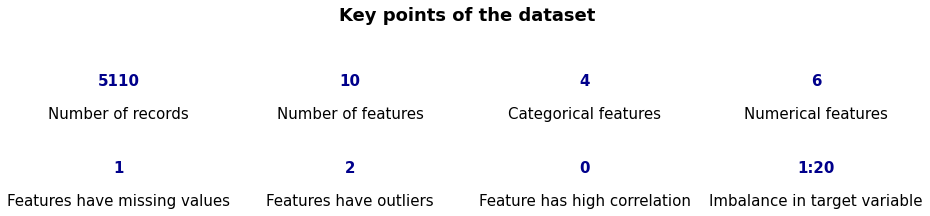

In [15]:
fig=plt.figure(figsize=(5,2),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.text(1.25,1, "Key points of the dataset", color='black', fontsize=18, fontweight='bold', ha='center')

ax0.text(0,0.4, "5110", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(0,0.1, "Number of records", color='black', fontsize=15, fontweight='light', ha='center')

ax0.text(0.83,0.4, "10", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(0.83,0.1, "Number of features", color='black', fontsize=15, fontweight='light', ha='center')

ax0.text(1.67,0.4, "4", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(1.67,0.1, "Categorical features", color='black', fontsize=15, fontweight='light', ha='center')

ax0.text(2.5,0.4, "6", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(2.5,0.1, "Numerical features", color='black', fontsize=15, fontweight='light', ha='center')

ax0.text(0,-0.4, "1", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(0,-0.7, "Features have missing values", color='black', fontsize=15, fontweight='light', ha='center')

ax0.text(0.83,-0.4, "2", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(0.83,-0.7, "Features have outliers", color='black', fontsize=15, fontweight='light', ha='center')

ax0.text(1.67,-0.4, "0", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(1.67,-0.7, "Feature has high correlation", color='black', fontsize=15, fontweight='light', ha='center')

ax0.text(2.5,-0.4, "1:20", color='darkblue', fontsize=15, fontweight='bold', ha='center')
ax0.text(2.5,-0.7, "Imbalance in target variable", color='black', fontsize=15, fontweight='light', ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

### <font color=darkred><i>Data Exploration Insights</i></font>

<font color=darkred>1. 4 categorical features need to be dealt with before proceeding to modeling</font><br>
<font color=darkred>2. BMI column has 201 rows of missing data</font><br>
<font color=darkred>3. stroke, hypertension and heart_disease have discrete values</font><br>
<font color=darkred>4. Most people in the dataset are between 30 and 60 years of age</font><br>
<font color=darkred>5. Majority people in the dataset have an average glucose level of 75 to 110</font><br>
<font color=darkred>6. Most people in the dataset have a BMI between 25 and 35</font><br>
<font color=darkred>7. avg_glucose_level and bmi have a relatively high number of outliers</font><br>
<font color=darkred>8. There is a significant difference of target variable class between positive (stroke) and negative (No Stroke) - 1 person with stroke for every 20 people without stroke: we have an <b>imbalanced dataset</b></font><br>
<font color=darkred>9. All features have relatively low correlation</font><br>

## 3. Data Preprocessing

1. Replace missing values
2. Deal with the outliers/extreme values 
3. Perform label/one hot encoding
4. Split dataset into test and train
5. Perform class balancing operations - most crucial

#### Replacing missing values

In [16]:
df['bmi'] = df['bmi'].replace({np.nan : np.mean(df['bmi'])}) #replacing with mean
df.isnull().sum() #verify null values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Dealing with outliers by replacing them with median value of column
As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the <b>median value.</b>

In [17]:
avg_glucose_level_quartile_1 = np.percentile(df['avg_glucose_level'], 25, interpolation = 'midpoint') 
avg_glucose_level_quartile_3 = np.percentile(df['avg_glucose_level'], 75, interpolation = 'midpoint') 
avg_glucose_level_IQR = avg_glucose_level_quartile_3 - avg_glucose_level_quartile_1
avg_glucose_level_lowerlimit = avg_glucose_level_quartile_1 - 1.5 * avg_glucose_level_IQR
avg_glucose_level_upperlimit = avg_glucose_level_quartile_3 + 1.5 * avg_glucose_level_IQR
avg_glucose_level_median = np.median(df['avg_glucose_level'])

In [18]:
bmi_quartile_1 = np.percentile(df['bmi'], 25, interpolation = 'midpoint') 
bmi_quartile_3 = np.percentile(df['bmi'], 75, interpolation = 'midpoint') 
bmi_IQR = bmi_quartile_3 - bmi_quartile_1
bmi_lowerlimit = bmi_quartile_1 - 1.5 * bmi_IQR
bmi_upperlimit = bmi_quartile_3 + 1.5 * bmi_IQR
bmi_median = np.median(df['bmi'])

In [19]:
#performing median imputation for outlier values
df['bmi'].loc[(df['bmi'] > bmi_upperlimit) | (df['bmi'] < bmi_lowerlimit)] = bmi_median

df['avg_glucose_level'].loc[(df['avg_glucose_level'] > avg_glucose_level_upperlimit) 
                            | (df['avg_glucose_level'] < avg_glucose_level_lowerlimit)] = avg_glucose_level_median

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Pefrom Label Encoding using One Hot encoder
The LabelEncoder is not preferred as it induces a sort of order/priority amongst the categorical values

In [21]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   uint8  
 8   gender_Male                     5110 non-null   uint8  
 9   gender_Other                    5110 non-null   uint8  
 10  ever_married_No                 5110 non-null   uint8  
 11  ever_married_Yes                5110 non-null   uint8  
 12  work_type_Govt_job              51

#### Feature Selection using SelectPercentile

In [22]:
#splitting dataset into target & features set
X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']

#normalization
minMaxScaler = MinMaxScaler()
X['age'] = minMaxScaler.fit_transform(X[['age']])
X['avg_glucose_level'] = minMaxScaler.fit_transform(X[['avg_glucose_level']])

#select features according to a percentile of the highest scores
selectedPerc=SelectPercentile(score_func=f_classif,percentile=70) 
X_trans = selectedPerc.fit_transform(X,y)
X_trans.shape

(5110, 14)

**Splitting Dataset**

In [23]:
#perform stratified train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, stratify = y, random_state=42)
X_train.shape

(4088, 14)

#### Class Balancing Operations

We try out 3 class balancing operations: 
1. Random Under Sampling
2. Random Over Sampling
3. Synthetic Minority Oversampling Technique (SMOTE)

Carrying these out will help us evaluate performance between different datasets to choose the best possible model & dataset as our solution.

In [24]:
#Class Balancing Operations on Training dataset
#oversampling
X_ros, y_ros = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)
#SMOTE
X_smote, y_smote = SMOTE(sampling_strategy='minority', random_state=42).fit_resample(X_train, y_train)
#undersampling
X_rus, y_rus = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

In [25]:
#function to evaluate model, print accuracy and classfication report
def model_eval(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    true_negative, false_postive, false_negative, true_positive = metrics.confusion_matrix(y_test, y_pred).ravel()
    
    print("True Negative: ", true_negative)
    print("False Positive: ", false_postive)
    print("False Negative: ", false_negative)
    print("True Positive: ", true_positive)
    target_names = ['No Stroke suffered', 'Stroke suffered']
    print(metrics.classification_report(y_test, y_pred, target_names=target_names))
    return acc, confusion_matrix

## 4. Model Training & Hyperparameter tuning

### Algorithm 1 - RandomForestClassifier

In [26]:
#RandomForestClassifier without optimization
def randomClassfier_fn(X,y):
    #create a gaussian classifier
    randomClassfier=RandomForestClassifier(n_estimators=100)

    #train the model using the training set
    randomClassfier.fit(X,y)

    #predict the values using trained model
    y_pred=randomClassfier.predict(X_test)
    return randomClassfier, y_pred

We will train the RandomForestClassifier with two dataset, one with undersampling and other with synthetic oversampling and compare the ROC-AUC for them.

In [27]:
#RandomForestClassifier with undersampling
randomClassfier, y_pred = randomClassfier_fn(X_rus, y_rus)
#evaluate the model
random_forest_accuracy, random_forest_confusion_matrix = model_eval(y_test, y_pred)

Accuracy: 0.6888454011741683
True Negative:  669
False Positive:  303
False Negative:  15
True Positive:  35
                    precision    recall  f1-score   support

No Stroke suffered       0.98      0.69      0.81       972
   Stroke suffered       0.10      0.70      0.18        50

          accuracy                           0.69      1022
         macro avg       0.54      0.69      0.49      1022
      weighted avg       0.94      0.69      0.78      1022



In [28]:
#find the ROC AUC score before optimizing
randomu_roc_auc_score = metrics.roc_auc_score(y_test, randomClassfier.predict_proba(X_test)[:, 1])
print("Random Forest ROC AUC Score before hypertuneing: ",randomu_roc_auc_score)

Random Forest ROC AUC Score before hypertuneing:  0.7695267489711934


In [29]:
#RandomForestClassifier with Synthetic minority oversampling dataset
randomClassfierSMOTE, y_pred_smot = randomClassfier_fn(X_smote, y_smote)
#evaluate the model
random_forest_smote_accuracy, random_forest_smote_confusion_matrix = model_eval(y_test, y_pred)

Accuracy: 0.6888454011741683
True Negative:  669
False Positive:  303
False Negative:  15
True Positive:  35
                    precision    recall  f1-score   support

No Stroke suffered       0.98      0.69      0.81       972
   Stroke suffered       0.10      0.70      0.18        50

          accuracy                           0.69      1022
         macro avg       0.54      0.69      0.49      1022
      weighted avg       0.94      0.69      0.78      1022



### RandomForest parameters that are currently being used

In [30]:
#exisiting parameters of RandomForestClassifier used to train the model
print(randomClassfier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Hyperparameter Tuning

#### 1. Random Search Cross Validation - Undersampled Dataset

In [31]:
#parameters with different combinations for randomforestclassifier
random_grid = {'n_estimators':[64,100,128,200],
             'max_features':[2,3,5,7],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
             'bootstrap': [True, False]}

In [32]:
#random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
randomClassfier=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = randomClassfier, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_rus, y_rus)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [2, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [64, 100, 128, 200]},
                   random_state=42)

#### Best parameters for RandomForestClassifier() using undersampled dataset:

In [33]:
#best parameters found from RandomizedSearchCV
rf_random.best_params_

{'n_estimators': 128,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 3,
 'max_depth': 20,
 'bootstrap': True}

In [34]:
#get the best model with selected parameters
best_param_model = rf_random.best_estimator_
print(best_param_model)
#predict the values using new model
y_pred_randomforest_hp=best_param_model.predict(X_test)
#evaluate the model
random_forest_accuracy_hyp, rn_confusion_matrix_hyp = model_eval(y_test, y_pred_randomforest_hp)

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=128)
Accuracy: 0.662426614481409
True Negative:  638
False Positive:  334
False Negative:  11
True Positive:  39
                    precision    recall  f1-score   support

No Stroke suffered       0.98      0.66      0.79       972
   Stroke suffered       0.10      0.78      0.18        50

          accuracy                           0.66      1022
         macro avg       0.54      0.72      0.49      1022
      weighted avg       0.94      0.66      0.76      1022



In [35]:
#find the ROC AUC score
randomf_roc_auc_score = metrics.roc_auc_score(y_test, best_param_model.predict_proba(X_test)[:, 1])
print("Random Forest ROC AUC Score: ",randomf_roc_auc_score)

Random Forest ROC AUC Score:  0.8118621399176955


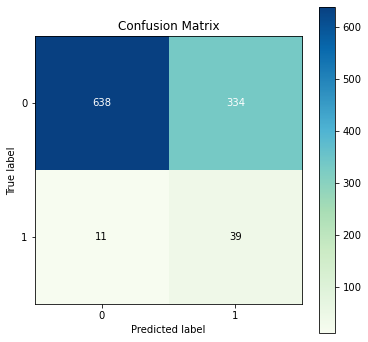

In [36]:
#plot the confusion matrix
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_randomforest_hp, figsize=(6,6), cmap= 'GnBu');

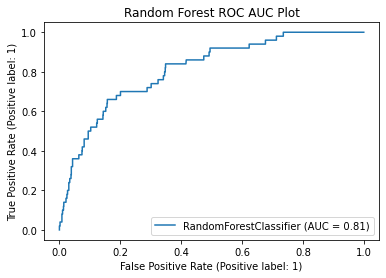

In [37]:
#plot the ROC AUC curve for the model trained with Random Forest
metrics.plot_roc_curve(best_param_model, X_test,y_test)
plt.title('Random Forest ROC AUC Plot')
plt.show()

#### 2. Random Search Cross Validation - Synthetic Minority Oversampling Technique Dataset

#### Best parameters for RandomForestClassifier() using SMOTE dataset:

In [38]:
#random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
randomClassfier=RandomForestClassifier()
rf_random_smote = RandomizedSearchCV(estimator = randomClassfier, param_distributions = random_grid, 
                                     n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random_smote.fit(X_smote, y_smote)

#get the best model with selected parameters
best_param_model_smote = rf_random_smote.best_estimator_
print(best_param_model_smote)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=2,
                       min_samples_split=5, n_estimators=200)


In [39]:
#predict the values using new model
y_pred_randomforest_smote_hp=best_param_model_smote.predict(X_test)
#evaluate the model
random_forest_smote_accuracy_hyp, rn_smote_confusion_matrix_hyp = model_eval(y_test, y_pred_randomforest_smote_hp)

Accuracy: 0.9227005870841487
True Negative:  938
False Positive:  34
False Negative:  45
True Positive:  5
                    precision    recall  f1-score   support

No Stroke suffered       0.95      0.97      0.96       972
   Stroke suffered       0.13      0.10      0.11        50

          accuracy                           0.92      1022
         macro avg       0.54      0.53      0.54      1022
      weighted avg       0.91      0.92      0.92      1022



In [40]:
#find the ROC AUC score
randomf_smote_roc_auc_score = metrics.roc_auc_score(y_test, best_param_model_smote.predict_proba(X_test)[:, 1])
print("Random Forest ROC AUC Score With SMOTE technique: ",randomf_smote_roc_auc_score)

Random Forest ROC AUC Score With SMOTE technique:  0.7369444444444444


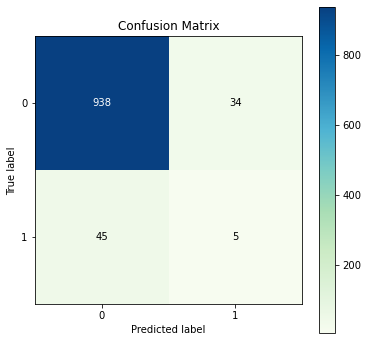

In [41]:
#plot the confusion matrix
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_randomforest_smote_hp, figsize=(6,6), cmap= 'GnBu');

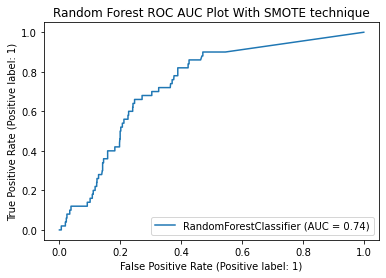

In [42]:
#plot the ROC AUC curve for the model trained with Random Forest
metrics.plot_roc_curve(best_param_model_smote, X_test,y_test)
plt.title('Random Forest ROC AUC Plot With SMOTE technique')
plt.show()

<font color=darkred>From above two ROC AUC plots we can see that data set with <b>undersampling has better AUC score than dataset with synthetic minority oversampling technique (SMOTE)</b>. <br> In our next algorithms, <b>we will be using undersampled dataset</b> to train the model.</font>

### Algorithm 2: Logistic Regression

In [43]:
#instantiate the logistic regression model
logisticRegr = LogisticRegression()
#fit the training data
logisticRegr.fit(X_rus, y_rus)
#predict the values using above trained model
y_pred_log=logisticRegr.predict(X_test)
#evaluate the model
logistic_reg_accuracy, logr_confusion_matrix = model_eval(y_test, y_pred_log)

Accuracy: 0.7152641878669276
True Negative:  691
False Positive:  281
False Negative:  10
True Positive:  40
                    precision    recall  f1-score   support

No Stroke suffered       0.99      0.71      0.83       972
   Stroke suffered       0.12      0.80      0.22        50

          accuracy                           0.72      1022
         macro avg       0.56      0.76      0.52      1022
      weighted avg       0.94      0.72      0.80      1022



In [44]:
#find the ROC AUC score before optimizing
logu_roc_auc_score = metrics.roc_auc_score(y_test, logisticRegr.predict_proba(X_test)[:, 1])
print("Logistic Regression ROC AUC Score before optimizing: ",logu_roc_auc_score)

Logistic Regression ROC AUC Score before optimizing:  0.8380658436213991


### Hyperparameter Tuning

In [45]:
#define parameter's for logistic regression
param_grid_log = {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
    }

#### Best parameters for LogisticRegression():

In [46]:
logisticReg = LogisticRegression()
#search for best parameters using RandomizedSearchCV algorithm
log_model=RandomizedSearchCV(estimator=logisticReg, param_distributions=param_grid_log, cv=3, verbose=True, n_jobs=-1)
log_model_ins = log_model.fit(X_rus,y_rus)
print(log_model.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.615848211066026}


In [47]:
#get the model with best selected parameters
log_model_grid = log_model_ins.best_estimator_
#predict the values using above selected parameters
y_pred_log_grid=log_model_grid.predict(X_test)
#evaluate the model
logistic_reg_accuracy_hyp, logr_confusion_matrix_hyp =  model_eval(y_test, y_pred_log_grid)

Accuracy: 0.7240704500978473
True Negative:  700
False Positive:  272
False Negative:  10
True Positive:  40
                    precision    recall  f1-score   support

No Stroke suffered       0.99      0.72      0.83       972
   Stroke suffered       0.13      0.80      0.22        50

          accuracy                           0.72      1022
         macro avg       0.56      0.76      0.53      1022
      weighted avg       0.94      0.72      0.80      1022



In [48]:
#find the ROC AUC score
logr_roc_auc_score = metrics.roc_auc_score(y_test, log_model_grid.predict_proba(X_test)[:, 1])
print("Logistic Regression ROC AUC Score: ",logr_roc_auc_score)

Logistic Regression ROC AUC Score:  0.8348559670781893


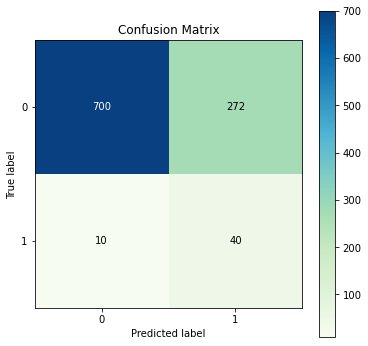

In [49]:
#plot the confusion matrix
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_log_grid, figsize=(6,6), cmap= 'GnBu');

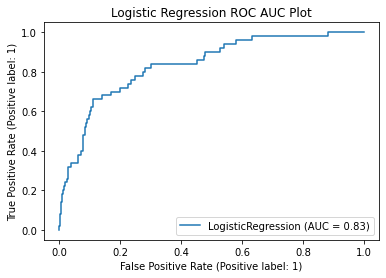

In [50]:
#plot the ROC AUC curve for the model trained with Logistic regression
metrics.plot_roc_curve(log_model_grid, X_test,y_test)
plt.title('Logistic Regression ROC AUC Plot')
plt.show()

### Algorithm 3 : SVM

In [51]:
#instantiate the SVC model with linear kernel
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel
#fit the model
clf.fit(X_rus, y_rus)
#predict the values using above trained model
y_pred_svm = clf.predict(X_test)
#evaluate the model
svc_accuracy, svc_confusion_matrix = model_eval(y_test, y_pred_svm)

Accuracy: 0.7103718199608611
True Negative:  684
False Positive:  288
False Negative:  8
True Positive:  42
                    precision    recall  f1-score   support

No Stroke suffered       0.99      0.70      0.82       972
   Stroke suffered       0.13      0.84      0.22        50

          accuracy                           0.71      1022
         macro avg       0.56      0.77      0.52      1022
      weighted avg       0.95      0.71      0.79      1022



In [52]:
#find the ROC AUC score before optimizing
svmu_roc_auc_score = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("SVM ROC AUC Score Before Optimizing: ",svmu_roc_auc_score)

SVM ROC AUC Score Before Optimizing:  0.8391975308641975


#### Best parameters for SVC():

In [53]:
#define parameters with different values to choose from
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

#search for best parameters using RandomizedSearchCV algorithm           
grid_search_svm = RandomizedSearchCV(svm.SVC(random_state=42,probability=True),param_grid_svm)
grid_search_svm.fit(X_rus,y_rus)
print(grid_search_svm.best_params_)

{'kernel': 'linear', 'gamma': 0.0001, 'C': 1}


In [54]:
#get the model with best selected parameters
grid_svm_model = grid_search_svm.best_estimator_
#predict the values using above selected parameters
y_pred_grid_svm=grid_svm_model.predict(X_test)
#evaluate the model
svc_accuracy_hyp, svc_confusion_matrix_hyp = model_eval(y_test, y_pred_grid_svm)

Accuracy: 0.7103718199608611
True Negative:  684
False Positive:  288
False Negative:  8
True Positive:  42
                    precision    recall  f1-score   support

No Stroke suffered       0.99      0.70      0.82       972
   Stroke suffered       0.13      0.84      0.22        50

          accuracy                           0.71      1022
         macro avg       0.56      0.77      0.52      1022
      weighted avg       0.95      0.71      0.79      1022



In [55]:
#find the ROC AUC score
svm_roc_auc_score = metrics.roc_auc_score(y_test, grid_svm_model.predict_proba(X_test)[:, 1])
print("SVM ROC AUC Score: ",svm_roc_auc_score)

SVM ROC AUC Score:  0.8391975308641975


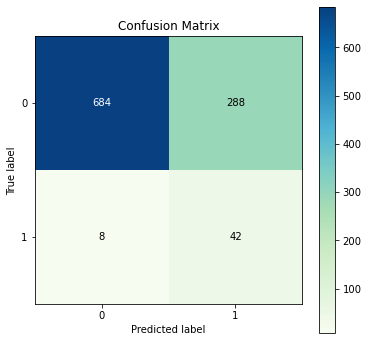

In [56]:
#plot the confusion matrix
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_grid_svm, figsize=(6,6), cmap= 'GnBu');

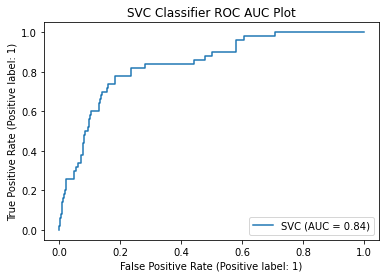

In [57]:
#plot the ROC AUC curve for SVC Classifier
metrics.plot_roc_curve(grid_svm_model, X_test,y_test)
plt.title('SVC Classifier ROC AUC Plot')
plt.show()

## 5. Model Evaluation/Comparison

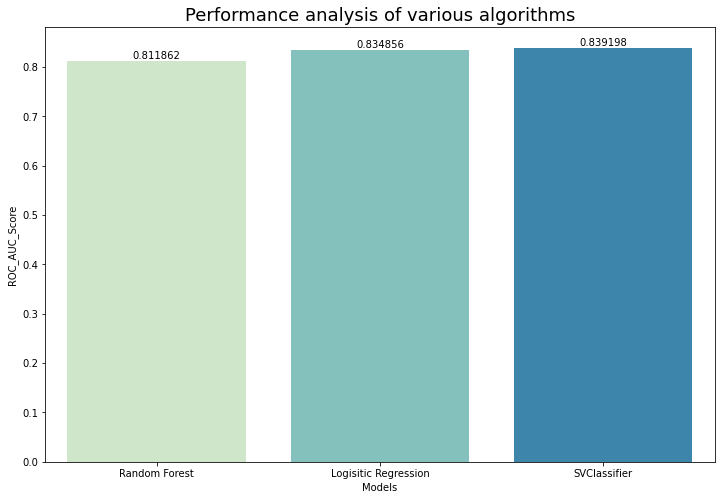

In [58]:
#create a dataframe with alogrithms with their accuracy and ROC AUC score
df = pd.DataFrame(
    data = {
        'Models': ['Random Forest','Logisitic Regression','SVClassifier'],
        'Accuracy': [random_forest_accuracy_hyp, logistic_reg_accuracy_hyp, svc_accuracy_hyp],
        'ROC_AUC_Score': [randomf_roc_auc_score, logr_roc_auc_score, svm_roc_auc_score]
    }
)

#plot alogrithm vs ROC AUC score graph to show the performance analysis
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Models", y="ROC_AUC_Score", data= df, palette="GnBu")
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of various algorithms',fontsize=18)
plt.show()

<AxesSubplot:title={'center':'SVM Classification'}>

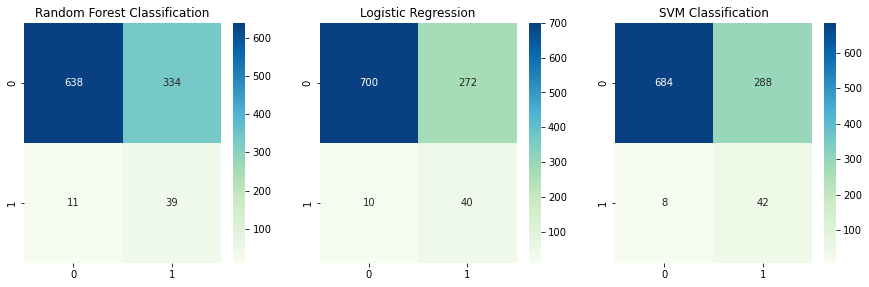

In [59]:
fig = plt.figure(figsize=(15,15))

#define axis for figure 1
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Random Forest Classification')

#define axis for figure 2
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('Logistic Regression')

#define axis for figure 3
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

#plot the confusion matrix for each of the algorithm
sns.heatmap(data=rn_confusion_matrix_hyp, annot=True, fmt='.0f', ax=ax1, cmap='GnBu')
sns.heatmap(data=logr_confusion_matrix_hyp, annot=True, fmt='.0f', ax=ax2, cmap='GnBu')
sns.heatmap(data=svc_confusion_matrix_hyp, annot=True, fmt='.0f', ax=ax3, cmap='GnBu')

## 6. Closing remarks

We began by analyzing our data and discovered that certain characteristics, such as avg_glucose_level and bmi 
have a relatively high number of outliers. Additionally, from the above value counts we can see that there is a 
significant difference of target variable class between positive (stroke) and negative (No Stroke) - 1 person with 
stroke for every 20 people without stroke: we have an imbalanced dataset. We then carried out data preprocessing techniques 
like handling null values, outliers and sampling the dataset to make the target class balanced. We trained multiple models using Random Forest Classification, Logistic Regression and SVM. Since this was an imbalanced dataset it doesn't make sense to consider accuracy as a performance metric as models that are only capable of making accurate predictions for the majority class will appear to be very effective. We will use ROC AUC score and Recall as our performance metric.

#### Below are the result before optimizing the models- 

                                                    
<i><b>1. Random Forest Classification</b></i>     
    Recall ->  <font color=darkred><b>0.70</b></font>   
    ROC AUC Score -> <font color=darkred><b>0.78</b></font> 
    
<i><b>2. Logistic Regression</b></i>              
    Recall -> <font color=darkred><b>0.72</b></font>   
    ROC AUC Score -> <font color=darkred><b>0.83</b></font>
    
<i><b>3. SVM</b></i>        
    Recall -> <font color=darkred><b>0.71</b></font>   
    ROC AUC Score -> <font color=darkred><b>0.83</b></font>
    
After training the model, we tried hypertuning the parameters to improve the performance.
#### Below are the result after optimizing (hyperparamter tuning) the models- 

                                                 
<i><b>1. Random Forest Classification</b></i>                   
    Recall -> <font color=darkred><b>0.66</b></font>   
    ROC AUC Score -> <font color=darkred><b>0.80</b></font>
    
<i><b>2. Logistic Regression</b></i>                      
    Recall -> <font color=darkred><b>0.73</b></font>   
    ROC AUC Score -> <font color=darkred><b>0.84</b></font>
    
<i><b>3. SVM</b></i>                                     
    Recall -> <font color=darkred><b>0.71</b></font>    
    ROC AUC Score -> <font color=darkred><b>0.84</b></font>
    
From above comparison we can see that <b>Logistic Regression and SVM</b> models' ROC AUC score are nearly similar, but <b>Logistic Regression has higher recall</b>. Higher recall means that model returns most of the relevant results.

<font color=darkred>Hence, the <b>hypertuned Logistic Regression model is the best model for our use case</b>.</font>